In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import minkowskitools as mt

In [2]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

**Generate random points and plot them quickly.** These are distributed using uniform [Poission Point Process](https://en.wikipedia.org/wiki/Poisson_point_process) and constrained between 0 and 1. 

In [6]:
n=2000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

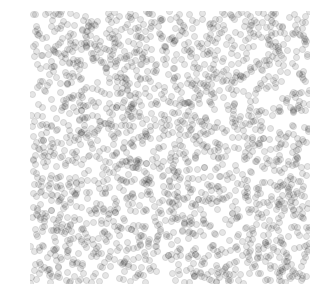

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
mt.plot_points_simple(ax, points)

Finding the **shortest path** accross the space using the Minkowski distance (here use `p=2`), and connecting points within radius 0.05 in the upper left direction. Plot.

In [8]:
connections = mt.get_connections(points, pval=2, radius=.05)
short_path, shortest_distance = mt.shortest_path(connections)
_ = [print('-> {}'.format(ind), end=' ') for ind in short_path]

-> 1999 -> 1181 -> 1024 -> 1144 -> 1163 -> 235 -> 386 -> 850 -> 4 -> 517 -> 758 -> 1933 -> 1298 -> 1948 -> 490 -> 431 -> 1694 -> 1143 -> 1799 -> 984 -> 162 -> 1089 -> 102 -> 1067 -> 826 -> 1542 -> 217 -> 859 -> 214 -> 1950 -> 1923 -> 1336 -> 60 -> 884 -> 1958 -> 389 -> 851 -> 538 -> 1998 

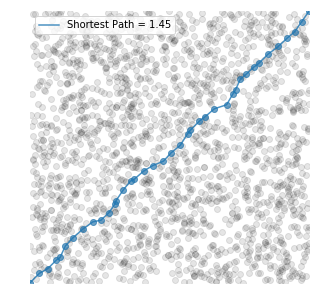

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
mt.plot_points_simple(ax, points, [short_path], ['Shortest Path = {:.3}'.format(shortest_distance)])

**Varying the Minkowski distance p value** and visualising the results.

Generating points - 1 - 2 - 3 - 4 
Getting connections: p=0.6, r=0.0715 

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:51: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:52: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


: p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 


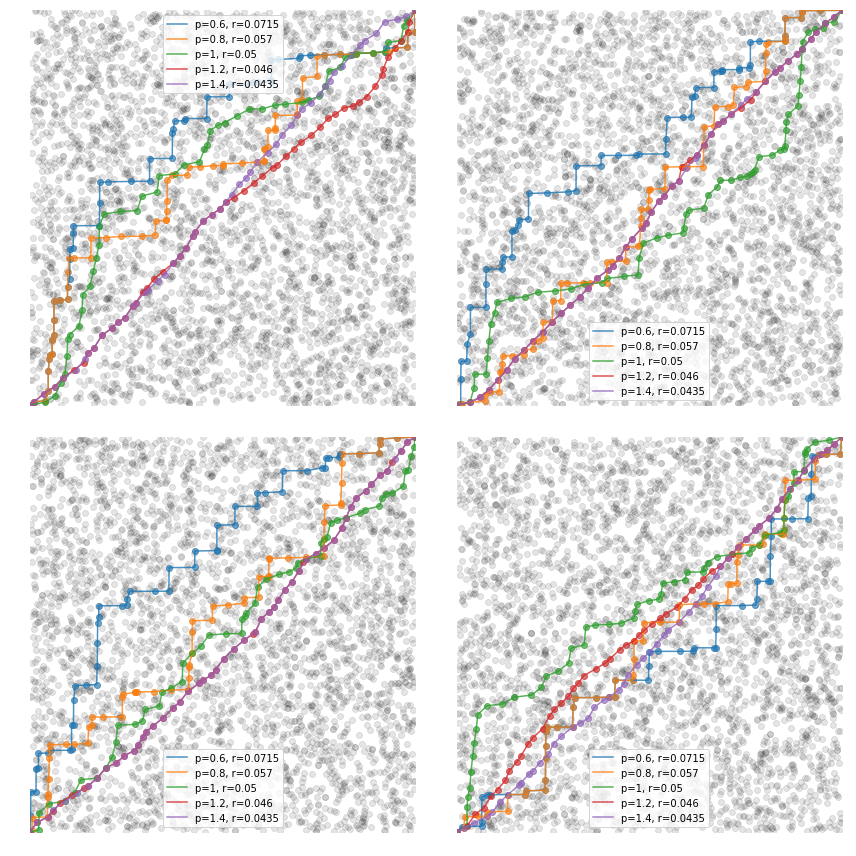

In [17]:
n=4000

fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/20

print('Generating points', end=' ')
ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(4) if not print('- {} '.format(count+1), end='')]
print()

for points, ax in zip(ensemble_points, axes.flatten()):

    path_labels = ['p={}, r={:.3}'.format(p, r) for p, r in zip(ps, rs)]
    
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections)[0] for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    mt.plot_points_simple(ax, points, short_paths, path_labels)

plt.tight_layout()

Investogating the networks and shortest paths

In [35]:
n=8000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

ps = [0.6, 0.8, 1, 1.2, 1.4]
rs = np.array([1.43, 1.14, 1, 0.92, 0.87])*0.05

In [36]:
ensemble_connections = [mt.get_connections(points, pval=p, radius=r) for p, r in zip(ps, rs)]
shortest_path_info = [mt.shortest_path(connections) for connections in ensemble_connections]
shortest_paths = [path_info[0] for path_info in shortest_path_info]
shortest_dists = [path_info[1] for path_info in shortest_path_info]

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:51: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:52: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


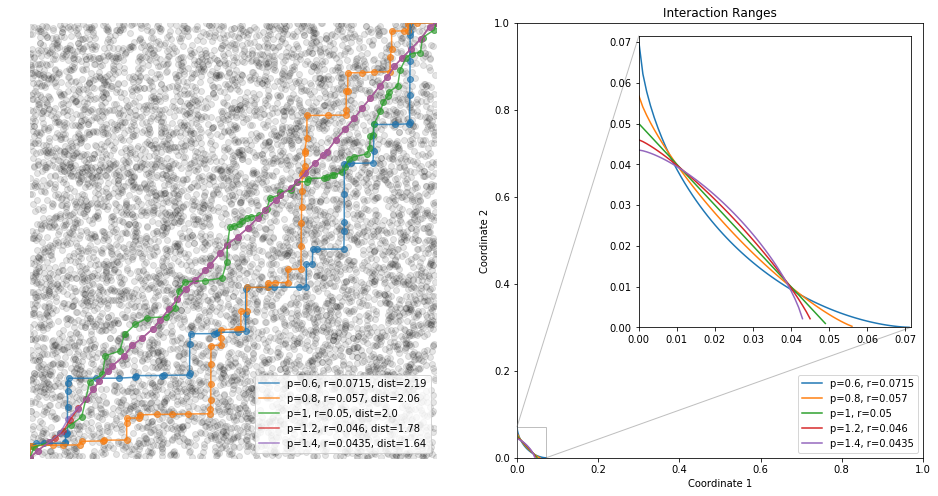

In [38]:
fig, [axL, axR] = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

path_labels = ['p={}, r={:.3}, dist={:.3}'.format(p, r, dist) for p, r, dist in zip(ps, rs, shortest_dists)]
mt.plot_points_simple(axL, points, shortest_paths, path_labels)
axL.legend(loc='lower right')

axR.set(xlim=[0, 1], ylim=[0, 1], title='Interaction Ranges', xlabel='Coordinate 1', ylabel='Coordinate 2')
axins = axR.inset_axes([0.3, 0.3, 0.67, 0.67])

for p, r, col in zip(ps, rs, cols):

    x = np.arange(r/1000, r*1001/1000, 1/1000)
    y = (r**p - x**p)**(1/p)
    axR.plot(x, y, label='p={}, r={:.3}'.format(p, r))
    axins.plot(x, y, label='p={}, r={:.3}'.format(p, r))

max_r = max(rs)
    
x1, x2, y1, y2 = 0, max_r, 0, max_r
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axR.indicate_inset_zoom(axins, label=None)
axR.legend(loc='lower right')

# plt.savefig('./img/paths_ranges.pdf')